<a href="https://colab.research.google.com/github/aparnashok7/SCT_DS_2/blob/main/SCT_DS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

# Load the Titanic dataset
df = sns.load_dataset('titanic')

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [3]:
# Fill missing values for 'age' with the median
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing values for 'embarked' with the mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop 'deck' column if too many missing values (if it had been present)
# df.drop(columns=['deck'], inplace=True)

<ipython-input-3-c86dff83f6bb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-3-c86dff83f6bb>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [4]:
# Remove duplicate entries
df.drop_duplicates(inplace=True)

In [5]:
# Convert 'survived' to categorical
df['survived'] = df['survived'].astype('category')

# Convert 'pclass' to categorical
df['pclass'] = df['pclass'].astype('category')

In [6]:
# Display the first few rows
print(df.head())

# Check the dimensions of the dataset
print(df.shape)

# Get summary statistics
print(df.describe())

# Check data types
print(df.dtypes)

# Check for missing values again
print(df.isnull().sum())

  survived pclass     sex   age  sibsp  parch     fare embarked  class    who  \
0        0      3    male  22.0      1      0   7.2500        S  Third    man   
1        1      1  female  38.0      1      0  71.2833        C  First  woman   
2        1      3  female  26.0      0      0   7.9250        S  Third  woman   
3        1      1  female  35.0      1      0  53.1000        S  First  woman   
4        0      3    male  35.0      0      0   8.0500        S  Third    man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  
1       False    C    Cherbourg   yes  False  
2       False  NaN  Southampton   yes   True  
3       False    C  Southampton   yes  False  
4        True  NaN  Southampton    no   True  
(781, 15)
              age       sibsp       parch        fare
count  781.000000  781.000000  781.000000  781.000000
mean    29.622817    0.524968    0.417414   34.750464
std     13.764671    0.987592    0.838132   52.237906
min  

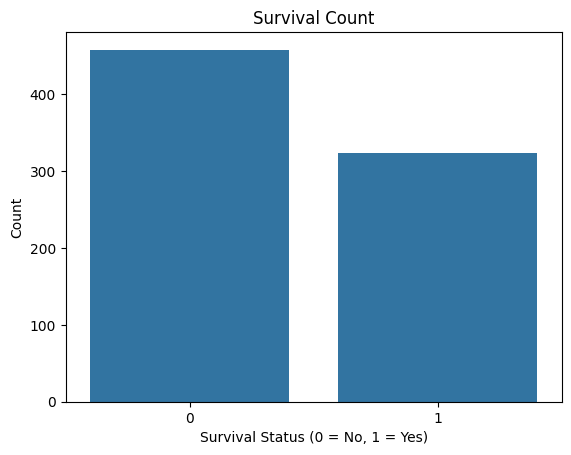

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt # Import matplotlib.pyplot

# Load the dataset (if not already loaded)
# df = sns.load_dataset('titanic')

sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survival Status (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

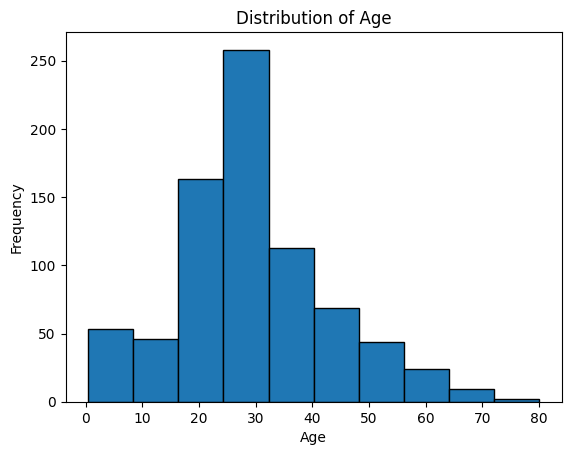

In [10]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=10, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

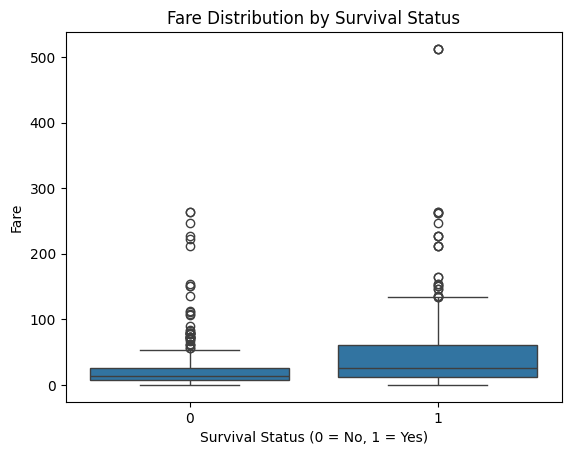

In [11]:
sns.boxplot(x='survived', y='fare', data=df)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survival Status (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

In [12]:
# Correlation matrix
correlation = df[['age', 'fare', 'pclass', 'survived']].corr()
print(correlation)

               age      fare    pclass  survived
age       1.000000  0.091575 -0.343458 -0.079430
fare      0.091575  1.000000 -0.549622  0.246585
pclass   -0.343458 -0.549622  1.000000 -0.330755
survived -0.079430  0.246585 -0.330755  1.000000


In [17]:
# Cross-tabulation of Pclass and Survival
import pandas as pd
import seaborn as sns
# Load the dataset
df = sns.load_dataset('titanic')
# Verify the column name
print(df.columns)
# Cross-tabulation (after confirming column name)
cross = pd.crosstab(df['pclass'], df['survived'])
print(cross)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
survived    0    1
pclass            
1          80  136
2          97   87
3         372  119
